# MolGraphNetwork Example

In [1]:
from mgnn.MolGraphNetwork import MolGraphNetwork # https://github.com/hauser-group/MolGraphNetwork
from scf_guess_datasets import Qm9Isomeres # https://github.com/hauser-group/scf_guess_datasets
import scf_guess_datasets # https://github.com/hauser-group/scf_guess_datasets
from scf_guess_tools import Backend # https://github.com/hauser-group/scf_guess_tools

## Dataset Setup

In [2]:
path_to_dataset = "minimal_example_dataset"
path_to_xyz_source = f"{path_to_dataset}/xyz"
dataset = Qm9Isomeres(
    path_to_dataset, 
    size = 50, # number of molecules to load
    val=0.1, # using 80% training / 10 % val / 10% test split
    test=0.1
)
dataset.xyz = path_to_xyz_source # set xyz source path to local example folder

## Model Setup

In [3]:
MGNN = MolGraphNetwork(dataset=dataset,
                       basis= f"{path_to_dataset}/6-31g_2df_p_custom_nwchem.gbs",
                       backend=Backend.PY,
                       batch_size=8,
                       hidden_dim=256,
                       message_passing_steps=3,
                       edge_threshold_val=2.5,
                       message_net_layers=2,
                       message_net_dropout=0.15,
                       target="density",
                       data_aug_factor=1,
                       verbose_level=1)
MGNN.load_data() # generate graphs to get the network ready for training

Setting verbose level to: 1
Loading 50 files from qm9_isomeres...


Creating training graphs: 40it [00:00, 382.07it/s]
Creating validation graphs: 5it [00:00, 326.54it/s]
Creating test graphs: 5it [00:00, 381.09it/s]

Total samples: 50, Train: 40, Val: 5, Test: 5
Found 3 center keys (['C', 'H', 'O']) and 6 edge keys (['C_C', 'C_H', 'C_O', 'H_H', 'H_O', 'O_O']) in the training set. -> Totaling 9 unique encoder/decoder.


Normalization factors computed and applied.
First train batch: 152 atoms, 870 edges, 152 center blocks.
---
Model setup (encoders / decoders message net) complete!


In [4]:
MGNN.train_model(num_epochs=10, lr=0.000268, weight_decay=1.78e-5, model_save_path=f"{path_to_dataset}/models/example_model.pth")

Epoch 1 [Train]: 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]


Epoch 1/10 → Avg Train Loss: 126.101129


Epoch 1 [Val]: 100%|██████████| 1/1 [00:00<00:00, 28.92it/s]


Epoch 1/10 → Avg Val   Loss: 122.521385
Model checkpoint saved to minimal_example_dataset/models/example_model.pth


Epoch 2 [Train]: 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]


Epoch 2/10 → Avg Train Loss: 115.707991


Epoch 2 [Val]: 100%|██████████| 1/1 [00:00<00:00, 39.04it/s]


Epoch 2/10 → Avg Val   Loss: 110.928711
Model checkpoint saved to minimal_example_dataset/models/example_model.pth


Epoch 3 [Train]: 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]


Epoch 3/10 → Avg Train Loss: 102.319380


Epoch 3 [Val]: 100%|██████████| 1/1 [00:00<00:00, 20.66it/s]


Epoch 3/10 → Avg Val   Loss: 98.491081
Model checkpoint saved to minimal_example_dataset/models/example_model.pth


Epoch 4 [Train]: 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]


Epoch 4/10 → Avg Train Loss: 91.453197


Epoch 4 [Val]: 100%|██████████| 1/1 [00:00<00:00, 36.78it/s]


Epoch 4/10 → Avg Val   Loss: 91.068298
Model checkpoint saved to minimal_example_dataset/models/example_model.pth


Epoch 5 [Train]: 100%|██████████| 5/5 [00:01<00:00,  4.75it/s]


Epoch 5/10 → Avg Train Loss: 82.540062


Epoch 5 [Val]: 100%|██████████| 1/1 [00:00<00:00, 35.68it/s]


Epoch 5/10 → Avg Val   Loss: 82.687309
Model checkpoint saved to minimal_example_dataset/models/example_model.pth


Epoch 6 [Train]: 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]


Epoch 6/10 → Avg Train Loss: 74.036729


Epoch 6 [Val]: 100%|██████████| 1/1 [00:00<00:00, 37.83it/s]


Epoch 6/10 → Avg Val   Loss: 76.199265
Model checkpoint saved to minimal_example_dataset/models/example_model.pth


Epoch 7 [Train]: 100%|██████████| 5/5 [00:01<00:00,  4.64it/s]


Epoch 7/10 → Avg Train Loss: 66.776012


Epoch 7 [Val]: 100%|██████████| 1/1 [00:00<00:00, 20.97it/s]


Epoch 7/10 → Avg Val   Loss: 69.989914
Model checkpoint saved to minimal_example_dataset/models/example_model.pth


Epoch 8 [Train]: 100%|██████████| 5/5 [00:01<00:00,  3.97it/s]


Epoch 8/10 → Avg Train Loss: 59.624556


Epoch 8 [Val]: 100%|██████████| 1/1 [00:00<00:00, 30.23it/s]


Epoch 8/10 → Avg Val   Loss: 63.591919
Model checkpoint saved to minimal_example_dataset/models/example_model.pth


Epoch 9 [Train]: 100%|██████████| 5/5 [00:01<00:00,  4.51it/s]


Epoch 9/10 → Avg Train Loss: 53.019041


Epoch 9 [Val]: 100%|██████████| 1/1 [00:00<00:00, 25.23it/s]


Epoch 9/10 → Avg Val   Loss: 57.973156
Model checkpoint saved to minimal_example_dataset/models/example_model.pth


Epoch 10 [Train]: 100%|██████████| 5/5 [00:02<00:00,  2.23it/s]


Epoch 10/10 → Avg Train Loss: 47.357555


Epoch 10 [Val]: 100%|██████████| 1/1 [00:00<00:00, 22.60it/s]


Epoch 10/10 → Avg Val   Loss: 53.036701
Model checkpoint saved to minimal_example_dataset/models/example_model.pth


Epoch 10 [Test]: 100%|██████████| 1/1 [00:00<00:00, 34.22it/s]

Test  Loss: 47.433945


(10,
 {'train_loss': [126.10112915039062,
   115.70799102783204,
   102.31938018798829,
   91.4531967163086,
   82.5400619506836,
   74.03672943115234,
   66.7760124206543,
   59.62455596923828,
   53.01904067993164,
   47.35755462646485],
  'val_loss': [122.5213851928711,
   110.9287109375,
   98.49108123779297,
   91.06829833984375,
   82.68730926513672,
   76.19926452636719,
   69.98991394042969,
   63.5919189453125,
   57.9731559753418,
   53.03670120239258],
  'test_loss': 47.43394470214844,
  'lr': [0.000268,
   0.000268,
   0.000268,
   0.000268,
   0.000268,
   0.000268,
   0.000268,
   0.000268,
   0.000268,
   0.000268]})

Models can be loaded using _load\_model_

In [5]:
MGNN.load_model(f"{path_to_dataset}/models/example_model.pth")

Loaded weights from minimal_example_dataset/models/example_model.pth (strict=True)


/home/etschgi1/REPOS/Masterarbeit/3_studies/mgnn/MolGraphNetwork.py:1082: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location=lambda sto

## Training History
For our example we might have a look at the learn rate as follows:

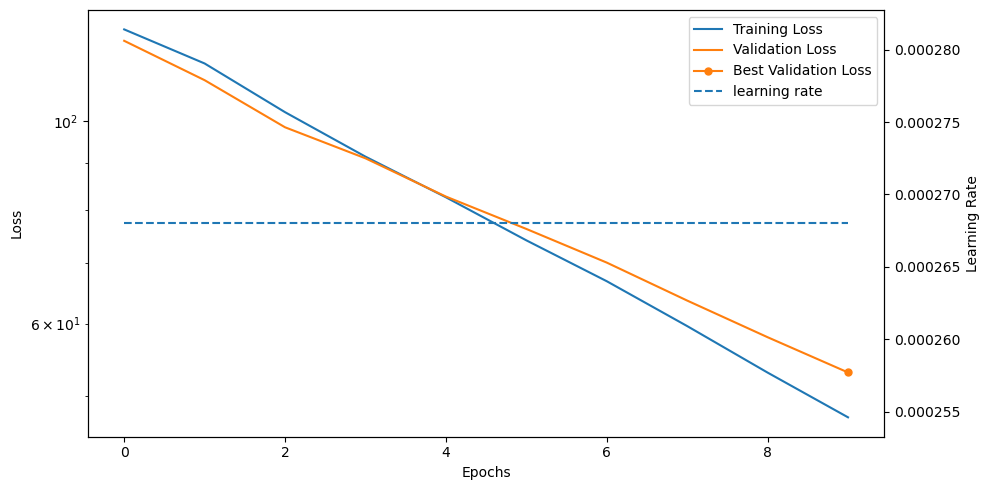

In [6]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
with open(f"{path_to_dataset}/models/example_model.history", "rb") as f: 
    hist = pickle.load(f)
# hist["train_loss"]
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(hist["train_loss"], label="Training Loss", color="tab:blue")
ax.plot(hist["val_loss"], label="Validation Loss", color="tab:orange")
ax.plot(np.array(hist["val_loss"]).argmin(), hist["val_loss"][np.array(hist["val_loss"]).argmin()],
         marker="o", markersize=5, color="tab:orange", label="Best Validation Loss")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_yscale("log")
ax2 = ax.twinx()
ax2.plot(hist["lr"], linestyle="--", label="learning rate")
ax2.set_ylabel("Learning Rate")
ax2.tick_params(axis='y')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper right")
plt.tight_layout()
plt.show()

## Predictions
Graphs of train/validation/test set can be obtained using get_graphs; Given a list of graphs we can obtain our predictions

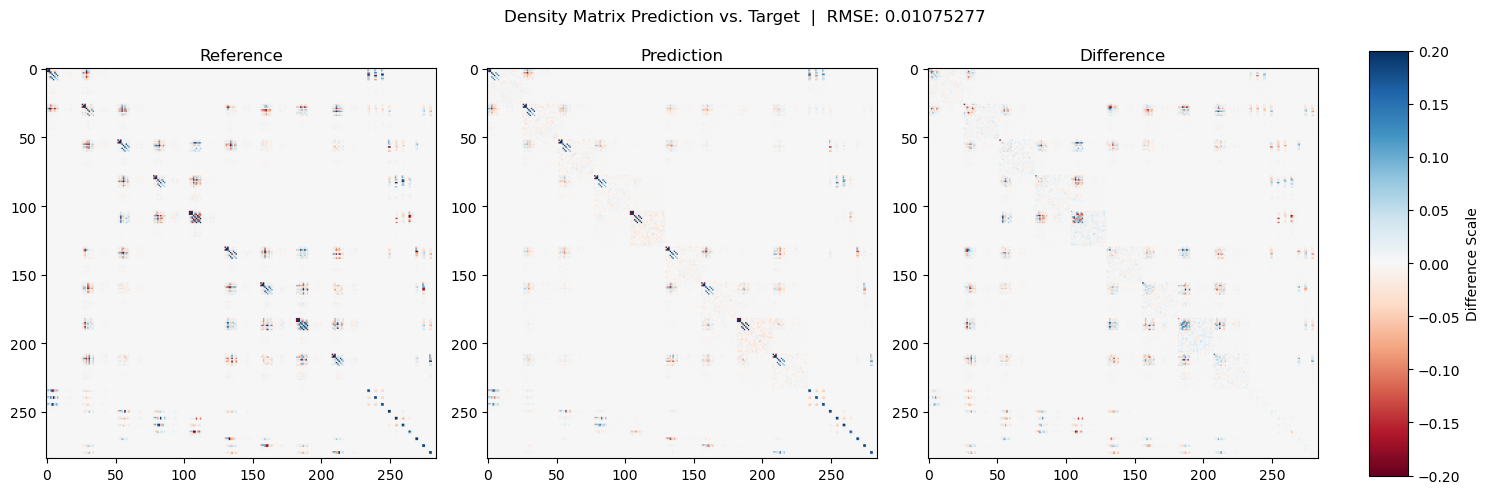

In [7]:
from mgnn.Graphutils import plot_mat_comp
test_graphs = MGNN.get_graphs("test")
density_prediction, density_truth = MGNN.predict([test_graphs[0]], include_target=True)[0] # we take the first prediction to compare it to the target!

plot_mat_comp(density_truth, density_prediction, title="Density Matrix Prediction vs. Target", vmax=0.2) 

## Calculate Metrics

Metrics such as the RMSE, DIIS-error, Energy error and iterations till convergence can be obtained...

We gather Fock, overlap and core Hamiltonian matrices first:

In [8]:
some_test_key = list(dataset.test_keys)[0]

overlap = dataset.solution(some_test_key).overlap
core_hamiltonian = dataset.solution(some_test_key).hcore

predicted_density = MGNN.predict([test_graphs[0]])[0]
fock_from_density = dataset.solver(some_test_key).get_fock(dm=predicted_density)

reference_density = dataset.solution(some_test_key).density

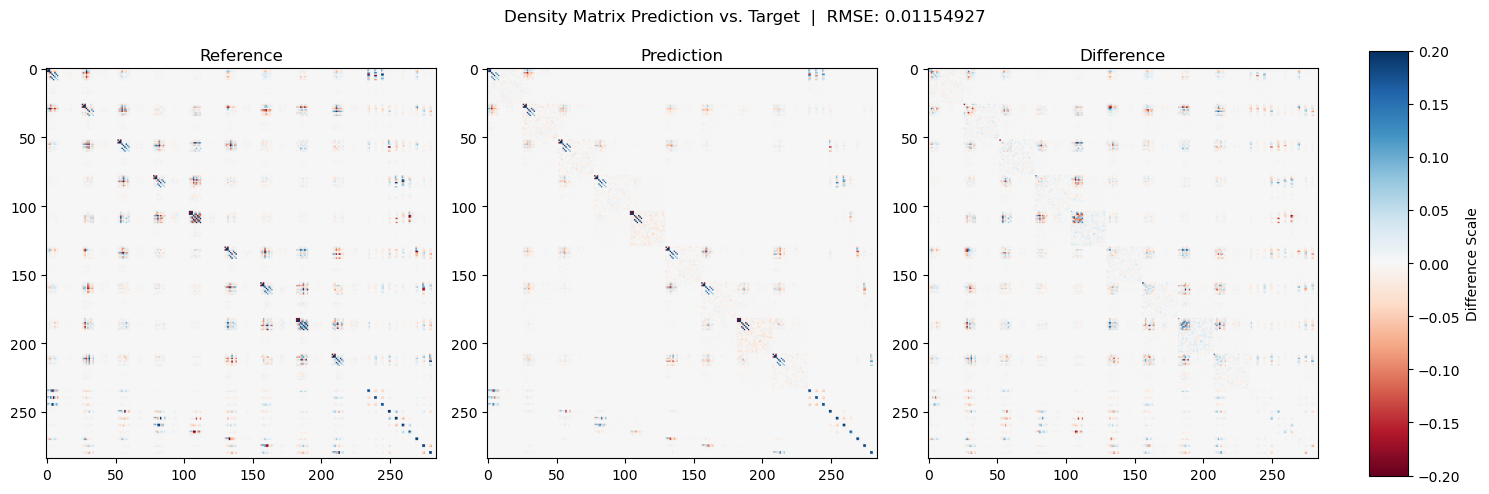

In [9]:
plot_mat_comp(reference_density, predicted_density, title="Density Matrix Prediction vs. Target", vmax=0.2) 


In [10]:
rmse = np.sqrt(np.mean((predicted_density - reference_density)**2))
print(f"RMSE of predicted density: {rmse:.6f}")

RMSE of predicted density: 0.011549


In [11]:
from mgnn.Graphutils import diis_rmse
diis_error = diis_rmse(overlap, predicted_density ,fock_from_density)
print(f"DIIS error of predicted density: {diis_error:.6f}")

DIIS error of predicted density: 0.047731


In [12]:
from mgnn.Graphutils import energy_elec, energy_err
e_conv = energy_elec(dataset.solution(some_test_key).fock, dataset.solution(some_test_key).density, core_hamiltonian)
e_pred = energy_elec(fock_from_density, predicted_density, core_hamiltonian)
abs_err, rel_err = energy_err(e_conv, e_pred)
print(f"Energy of predicted density: {e_pred:.6f} Ha")
print(f"Absolute energy error of predicted density: {abs_err:.3f} Ha")
print(f"Relative energy error of predicted density: {rel_err*100:.2f} %")

Energy of predicted density: -1729.063246 Ha
Absolute energy error of predicted density: 13.768 Ha
Relative energy error of predicted density: 0.80 %


In [13]:
solver = dataset.solver(some_test_key)
_, _, _, _, status = scf_guess_datasets.solve(solver, predicted_density.astype(np.float64))
iterations_own_guess = status.iterations
print(f"SCF converged in {iterations_own_guess} iterations when using the MGNN predicted density as initial guess.")

SCF converged in 16 iterations when using the MGNN predicted density as initial guess.


Not bad for a very small training set and only 10 epochs!